A simple example to show how to use the templates in this repo. These templates were generated using the LSST catsim and obssim tools.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
import matplotlib.gridspec as gridspec
import pickle

# Loading ab-type RR Lyrae templates
with open('templates/RRab_LSST.pkl', "rb") as f:
    lightcurves, metadata, periods = pickle.load(f, encoding='latin1')

obj_id = sorted(list(lightcurves.keys()))
len(obj_id)

999

For example the first RR Lyrae light curve is:

In [2]:
first_obj = obj_id[0]
lightcurve = lightcurves[first_obj]
lightcurve.keys()

dict_keys([b'i', b'r', b'u', b'z', b'g'])

All light curves have observations in five filters. 

Plotting this object in time:

Observations in band i: 405
Observations in band r: 405
Observations in band u: 126
Observations in band z: 361
Observations in band g: 177


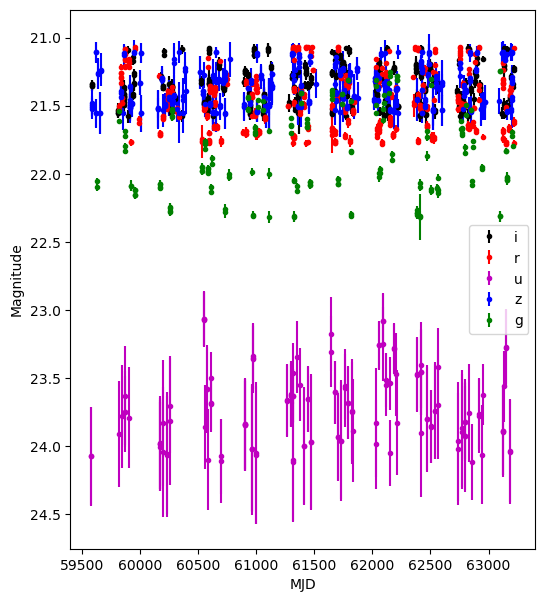

In [3]:
plot_colors = {b'u': 'm', b'g': 'g', b'r': 'r', b'i':'k', b'z':'b'}

fig, ax = plt.subplots(figsize=(6, 7))
for band_name, band_data in lightcurve.items():  
    print(f"Observations in band {band_name.decode()}: {len(band_data['mjd'])}")
    ax.errorbar(band_data['mjd'], band_data['mag'], band_data['error'], 
                fmt='.', label=band_name.decode(), c=plot_colors[band_name])
ax.legend();
ax.invert_yaxis()
ax.set_xlabel('MJD')
ax.set_ylabel('Magnitude');

For each object and each band the times (MJD), magnitudes and errorbars are provided. The number of samples per band is different.

We can use the period to fold and plot in phase:

0.533639


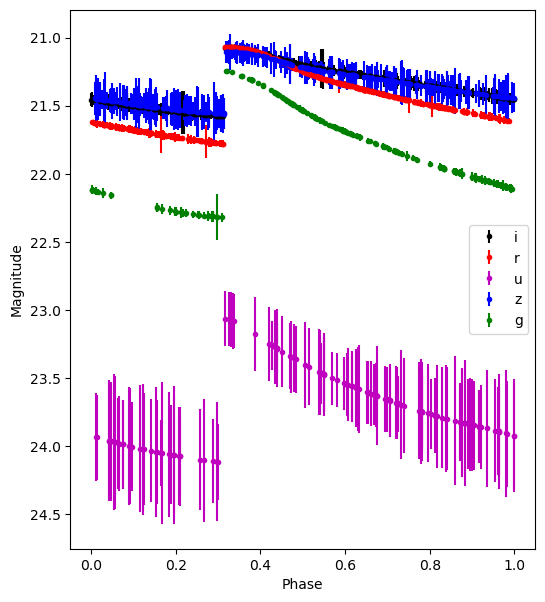

In [4]:
period = periods[first_obj]
print(period)

fig, ax = plt.subplots(figsize=(6, 7))
for band_name, band_data in lightcurve.items():  
    phase = np.mod(band_data['mjd'], period)/period
    ax.errorbar(phase, band_data['mag'], band_data['error'], 
                fmt='.', label=band_name.decode(), c=plot_colors[band_name])
ax.legend();
ax.invert_yaxis()
ax.set_xlabel('Phase')
ax.set_ylabel('Magnitude');

Note that noise has not been added to the magnitudes. The simulated errorbars can be used to add Gaussian heteroscedastic noise:

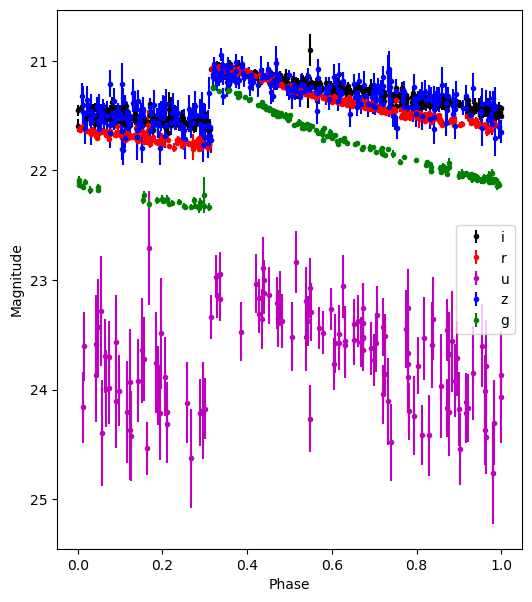

In [5]:
rng = np.random.RandomState(0)

fig, ax = plt.subplots(figsize=(6, 7))
for band_name, band_data in lightcurve.items():  
    phase = np.mod(band_data['mjd'], period)/period
    white_noise = rng.randn(band_data['mag'].shape[0])
    noisy_mags = band_data['mag'] + white_noise*band_data['error']
    ax.errorbar(phase, noisy_mags, band_data['error'], 
                fmt='.', label=band_name.decode(), c=plot_colors[band_name])
ax.legend();
ax.invert_yaxis()
ax.set_xlabel('Phase')
ax.set_ylabel('Magnitude');